## RoadMap
1. Loading the data
1. Preprocessing the data
1. Data Augmentation for solving the imbalanced data problem

## 1. Loading the dataset [(FER-2013)](https://www.kaggle.com/msambare/fer2013)
__For more details about this dataset you can visit:__
  - kaggle repo of the data 
  - Or refer to my readme file it has a quick summary about it.

1.1 Connect to google drive

In [1]:
!ls /content/drive/MyDrive/ColabNotebooks/datasets

archive.zip


1.2 Unzipping the data

In [2]:
# First copy the data into my working directory
!mkdir -p /content/dataset/fer2013

In [3]:
# Copy the arcive.zip file into the above dir
!cp /content/drive/MyDrive/ColabNotebooks/datasets/archive.zip /content/dataset/fer2013

In [4]:
# Unzip the archive file
import zipfile
with zipfile.ZipFile('/content/dataset/fer2013/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/fer2013')

!ls /content/dataset/fer2013/

archive.zip  test  train


In [5]:
!ls /content/dataset/fer2013/train

angry  disgust	fear  happy  neutral  sad  surprise


1.4 Getting a quick look at emotions and their number of provided examples.

In [6]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
train_data_path = '/content/dataset/fer2013/train'
test_data_path = '/content/dataset/fer2013/test'

In [7]:
# Checking for Imbalanced data
import os

emotions_distribution = {}
for emo in emotions:
  count = 0
  count = len(os.listdir(os.path.join(train_data_path, emo)))
  emotions_distribution[emo] = count

emotions_distribution

{'angry': 3995,
 'disgust': 436,
 'fear': 4097,
 'happy': 7215,
 'neutral': 4965,
 'sad': 4830,
 'surprise': 3171}

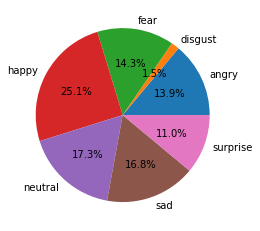

In [8]:
from matplotlib import pyplot as plt 

plt.pie(list(emotions_distribution.values()),
        labels = list(emotions_distribution.keys()),
        autopct = '%1.1f%%')
plt.show()

## 2. Fixing imbalanced dataset

__We have an Imbalanced dataset here__

__Raises the question how I'm gonna work with this imbalnce__

1. Gonna drop the disgust category as there isn't enough data for it
1. Gonna try to pump up the values of every other category to 6000 example per category

### 2.1 Dropping out the disgust category

In [9]:
!rm -rf /content/dataset/fer2013/train/disgust/
!rm -rf /content/dataset/fer2013/test/disgust/

!ls /content/dataset/fer2013/train/
!ls /content/dataset/fer2013/test/

angry  fear  happy  neutral  sad  surprise
angry  fear  happy  neutral  sad  surprise


### 2.2 Doing data augmentation for the rest of the data
1. Preprocessing the data for the ImageDataGenerator class

__Some important Notes__     
  - ImgDataGenerator takes 4d array (1, any_w, any_h, 3)
    > So we need to add this first dimension to our images

  - We should preprocess our whole vioelnce dataset
  - Adding it a giant list then converting it a numpy array


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import os

In [11]:
img_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [12]:
def preparing_data(path):
    img_data = []
    img_sze = (224, 244)
    
    #looping over every Img resize and convert it to an array and append it to list
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        img = Image.open(img_path).convert('RGB')
        img = img.resize(img_sze)
        img = np.array(img)
        
        img_data.append(img)
    
    return np.array(img_data)

In [13]:
def generating_data(data, path_2_save, prefix, batch_size, batches_number):
    """
    PARAMS::
    data: a numpy array that contains all your images preprocessed 
    path_2_save: folder destination that you will save the data on
    prefix: the prefix name of the generated files 
    batch_size: how many images to preduce in every iteration
    batches_number: How many batches you wanna generate 
    -> no_imgs = batch_size * batches_number 
    
    RETURNS::
    it saves the files on to the destination path
    """
    count = 0
    for batch in img_gen.flow(data, batch_size=batch_size,
                              save_to_dir=path_2_save,
                              save_prefix=prefix, save_format='jpeg'):

        if count > batches_number:
            break      

        count += 1

___Generating data for the surprise class___

In [17]:
!mkdir -p /content/dataset/generated/surprise 

In [18]:
generated_path = '/content/dataset/generated/surprise'
surprise_path = '/content/dataset/fer2013/train/surprise'

surprise_prepared = preparing_data(path=surprise_path)

In [19]:
surprise_prepared.shape

(3171, 244, 224, 3)

In [22]:
# !rm -rf /content/dataset/generated/surprise/*

In [24]:
## Generating surprised data
generating_data(surprise_prepared, generated_path, prefix='gen', batch_size=32, batches_number=80)

In [ ]:
!ls /content/dataset/generated/surprise | wc -l

In [26]:
!mv /content/dataset/generated/surprise/* /content/dataset/fer2013/train/surprise/.

In [28]:
!ls /content/dataset/fer2013/train/surprise/ | wc -l

5795


In [31]:
del surprise_prepared
del surprise_path

__Now we almost 6000 imgs on the samllest class__

__So let's repeat for the rest of the calssses__

In [29]:
!rmdir /content/dataset/generated/surprise

In [30]:
emotions_distribution

{'angry': 3995,
 'disgust': 436,
 'fear': 4097,
 'happy': 7215,
 'neutral': 4965,
 'sad': 4830,
 'surprise': 3171}

___Generating for the angry class 2000 imgs___

__steps__

__prepare. generate, empty the memory__


In [32]:
## prepare
angry_prepared = preparing_data('/content/dataset/fer2013/train/angry')

In [33]:
## Generate 2000 imgs
generating_data(angry_prepared,
                '/content/dataset/fer2013/train/angry/',
                prefix='gen',
                batch_size=20,
                batches_number=100)

In [34]:
!ls /content/dataset/fer2013/train/angry/ | wc -l

6035


In [35]:
## deleting the prepared data
del angry_prepared

__Generate fear 2000 Imgs__

In [ ]:
fear_prepared = preparing_data('/content/dataset/fer2013/train/fear')

generating_data(fear_prepared,
                '/content/dataset/fer2013/train/fear/',
                prefix='gen',
                batch_size=20,
                batches_number=100)


In [37]:
!ls /content/dataset/fer2013/train/fear/ | wc -l

6137


In [38]:
del fear_prepared

__Generate sad *1000* Imgs__

In [39]:
sad_prepared = preparing_data('/content/dataset/fer2013/train/sad')

generating_data(sad_prepared,
                '/content/dataset/fer2013/train/sad/',
                prefix='gen',
                batch_size=20,
                batches_number=100)
!ls /content/dataset/fer2013/train/sad/ | wc -l

6870


In [40]:
del sad_prepared

__Generate neutral *1000* Imgs__

In [41]:
neutral_prepared = preparing_data('/content/dataset/fer2013/train/neutral')

generating_data(neutral_prepared,
                '/content/dataset/fer2013/train/neutral/',
                prefix='gen',
                batch_size=10,
                batches_number=100)
!ls /content/dataset/fer2013/train/neutral/ | wc -l

5985


In [45]:
data_path = '/content/dataset/fer2013/train'
emo_dist = {}

for dir in os.listdir(data_path):
  imgs_count = len(os.listdir(os.path.join(data_path, dir)))
  emo_dist[dir] = imgs_count
  
  print(f"numer of imgs in the {dir} category is {imgs_count}")

numer of imgs in the surprise category is 5795
numer of imgs in the sad category is 6870
numer of imgs in the angry category is 6035
numer of imgs in the fear category is 6137
numer of imgs in the happy category is 7215
numer of imgs in the neutral category is 5985


In [46]:
emo_dist

{'angry': 6035,
 'fear': 6137,
 'happy': 7215,
 'neutral': 5985,
 'sad': 6870,
 'surprise': 5795}

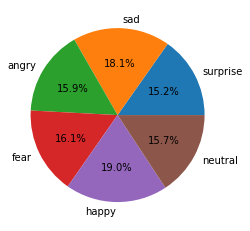

In [47]:
plt.pie(list(emo_dist.values()),
        labels = list(emo_dist.keys()),
        autopct = '%1.1f%%')
plt.show()

__Wow Now It looks Much better__

__Let's Now Save the edited data as an archive to use it later for training__

In [50]:
zf = zipfile.ZipFile("fer2013_balanced.zip", "w")
for dirname, subdirs, files in os.walk('/content/dataset/fer2013'):
    zf.write(dirname)
    for filename in files:
        zf.write(os.path.join(dirname, filename))
zf.close()

In [51]:
## copying it into my drive
!cp /content/dataset/fer2013_balanced.zip /content/drive/MyDrive/DataSets/

### Yeah ^_^ Done